<a href="https://colab.research.google.com/github/hawkilol/distributedSystems/blob/main/PortsDistributedSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import statistics
import pandas as pd
import io



In [105]:
!neofetch

            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
root@7962ff1837d6 
----------------- 
OS: Ubuntu 22.04.2 LTS x86_64 
Host: Google Compute Engine 
Kernel: 5.15.120+ 
Uptime: 5 hours, 45 mins 
Packages: 1296 (dpkg) 
Shell: bash 5.1.16 
Terminal: jupyter-noteboo 
CPU: Intel Xeon (2) @ 2.199GHz 
Memory:

In [ ]:
%%writefile servers.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/socket.h>
#include <netinet/in.h>

void error(char *msg)
{
    perror(msg);
    exit(1);
}

int main(int argc, char *argv[])
{
    int num_sockets = 10;
    int sockfd[num_sockets];
    socklen_t clilen;
    char buffer[256];
    struct sockaddr_in serv_addr, cli_addr;
    int n;
    int execution;

    if (argc < 2)
    {
        fprintf(stderr, "Erro, nenhuma porta indicada\n");
        exit(1);
    }

    FILE *file;
    execution = atoi(argv[1]);
    printf("Execution:%d\n", execution);


    if(execution == 0){
      file = fopen("ports.csv", "w");
      fprintf(file, "Port Number,Execution\n");
    }
    else{
      file = fopen("ports.csv", "a");
    }

    for (int i = 0; i < num_sockets; i++) {
        printf("socket%d\n", i);

        sockfd[i] = socket(AF_INET, SOCK_STREAM, 0);
        if (sockfd[i] < 0)
        {
            error("Erro ao abrir o socket");
        }

        // Força o OS a atribuir uma porta 'aleatoria' a partir de um socket temporario com bind na porta 0
        struct sockaddr_in temp_addr;
        bzero((char *)&temp_addr, sizeof(temp_addr));
        temp_addr.sin_family = AF_INET;
        temp_addr.sin_addr.s_addr = INADDR_ANY;
        temp_addr.sin_port = 0;

        if (bind(sockfd[i], (struct sockaddr *)&temp_addr, sizeof(temp_addr)) < 0)
        {
            error("Erro no binding do socket temporário");
        }

        // retornar a real porta que o OS atribuiu
        struct sockaddr_in actual_addr;
        socklen_t len = sizeof(actual_addr);
        if (getsockname(sockfd[i], (struct sockaddr *)&actual_addr, &len) == 0 &&
            actual_addr.sin_family == AF_INET && len == sizeof(actual_addr))
        {
            printf("Server is listening on port: %d\n", ntohs(actual_addr.sin_port));

            fprintf(file, "%d,%d\n", ntohs(actual_addr.sin_port), execution);

            printf("Closing Socket: %d", i);

            close(sockfd[i]);


        }
        else
        {
            perror("Error getting local port number");
        }

        listen(sockfd[i], 5);
    }
    fclose(file);

    for (int i = 0; i < num_sockets; i++) {
        while (1)
        {
            clilen = sizeof(cli_addr);
            int newsockfd = accept(sockfd[i], (struct sockaddr *)&cli_addr, &clilen);
            if (newsockfd < 0)
            {
                error("Erro ao aceitar");
            }
            bzero(buffer, 256);
            n = read(newsockfd, buffer, 255);
            if (n < 0)
            {
                error("Erro ao ler o socket");
            }
            printf("Mensagem recebida através do socket:\n %s\n", buffer);


            n = write(newsockfd, "Mensagem recebida :)", 19);
            if (n < 0)
            {
                error("Erro ao escrever no socket");
            }
            close(newsockfd);
        }

        close(sockfd[i]);
    }

    return 0;
}

Overwriting servers.c


In [ ]:
%%writefile serversCloseSock.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/socket.h>
#include <netinet/in.h>

void error(char *msg)
{
    perror(msg);
    exit(1);
}

int main(int argc, char *argv[])
{
    int num_sockets = 10;
    int sockfd[num_sockets];
    socklen_t clilen;
    char buffer[256];
    struct sockaddr_in serv_addr, cli_addr;
    int n;
    int execution;

    if (argc < 2)
    {
        fprintf(stderr, "Erro, nenhuma porta indicada\n");
        exit(1);
    }

    FILE *file;
    execution = atoi(argv[1]);
    printf("Execution:%d\n", execution);


    if(execution == 0){
      file = fopen("portsClose.csv", "w");
      fprintf(file, "Port Number,Execution\n");
    }
    else{
      file = fopen("portsClose.csv", "a");
    }

    for (int i = 0; i < num_sockets; i++) {
        printf("socket%d\n", i);

        sockfd[i] = socket(AF_INET, SOCK_STREAM, 0);
        if (sockfd[i] < 0)
        {
            error("Erro ao abrir o socket");
        }

        // Força o OS a atribuir uma porta 'aleatoria' a partir de um socket temporario com bind na porta 0
        struct sockaddr_in temp_addr;
        bzero((char *)&temp_addr, sizeof(temp_addr));
        temp_addr.sin_family = AF_INET;
        temp_addr.sin_addr.s_addr = INADDR_ANY;
        temp_addr.sin_port = 0;

        if (bind(sockfd[i], (struct sockaddr *)&temp_addr, sizeof(temp_addr)) < 0)
        {
            error("Erro no binding do socket temporário");
        }

        // retornar a real porta que o OS atribuiu
        struct sockaddr_in actual_addr;
        socklen_t len = sizeof(actual_addr);
        if (getsockname(sockfd[i], (struct sockaddr *)&actual_addr, &len) == 0 &&
            actual_addr.sin_family == AF_INET && len == sizeof(actual_addr))
        {
            printf("Server is listening on port: %d\n", ntohs(actual_addr.sin_port));

            fprintf(file, "%d,%d\n", ntohs(actual_addr.sin_port), execution);

            printf("Closing Socket: %d", i);

            close(sockfd[i]);


        }
        else
        {
            perror("Error getting local port number");
        }

        listen(sockfd[i], 5);
    }
    fclose(file);

    for (int i = 0; i < num_sockets; i++) {
        while (1)
        {
            clilen = sizeof(cli_addr);
            int newsockfd = accept(sockfd[i], (struct sockaddr *)&cli_addr, &clilen);
            if (newsockfd < 0)
            {
                error("Erro ao aceitar");
            }
            bzero(buffer, 256);
            n = read(newsockfd, buffer, 255);
            if (n < 0)
            {
                error("Erro ao ler o socket");
            }
            printf("Mensagem recebida através do socket:\n %s\n", buffer);


            n = write(newsockfd, "Mensagem recebida :)", 19);
            if (n < 0)
            {
                error("Erro ao escrever no socket");
            }
            close(newsockfd);
        }

        close(sockfd[i]);
    }

    return 0;
}

Overwriting serversCloseSock.c


In [ ]:
#OBS: É normal dar erro aqui pois o timeout retorna um exit status de 1
%%shell
ls
gcc servers.c -o servers

timeout 3 ./servers 0
timeout 3 ./servers 1
timeout 3 ./servers 2
timeout 3 ./servers 3
timeout 3 ./servers 4
timeout 3 ./servers 5
timeout 3 ./servers 6
timeout 3 ./servers 7
timeout 3 ./servers 8
timeout 3 ./servers 9 ; exit 0

port.csv    ports2.csv	    ports.csv  sample_data  servers    serversCloseSock    wtf.c
ports1.csv  portsClose.csv  port.txt   server.c     servers.c  serversCloseSock.c
Execution:0
socket0
Server is listening on port: 36663
Closing Socket: 0socket1
Server is listening on port: 37391
Closing Socket: 1socket2
Server is listening on port: 56809
Closing Socket: 2socket3
Server is listening on port: 54567
Closing Socket: 3socket4
Server is listening on port: 37933
Closing Socket: 4socket5
Server is listening on port: 50773
Closing Socket: 5socket6
Server is listening on port: 49675
Closing Socket: 6socket7
Server is listening on port: 54445
Closing Socket: 7socket8
Server is listening on port: 57865
Closing Socket: 8socket9
Server is listening on port: 34317
Erro ao aceitar: Bad file descriptor
Closing Socket: 9Execution:1
socket0
Server is listening on port: 47585
Closing Socket: 0socket1
Server is listening on port: 39607
Closing Socket: 1socket2
Server is listening on port: 45539
Closin

In [ ]:
%%shell
ls
gcc serversCloseSock.c -o servers

timeout 3 ./servers 0
timeout 3 ./servers 1
timeout 3 ./servers 2
timeout 3 ./servers 3
timeout 3 ./servers 4
timeout 3 ./servers 5
timeout 3 ./servers 6
timeout 3 ./servers 7
timeout 3 ./servers 8
timeout 3 ./servers 9 ; exit 0

port.csv    ports2.csv	    ports.csv  sample_data  servers    serversCloseSock    wtf.c
ports1.csv  portsClose.csv  port.txt   server.c     servers.c  serversCloseSock.c
Execution:0
socket0
Server is listening on port: 54467
Closing Socket: 0socket1
Server is listening on port: 49469
Closing Socket: 1socket2
Server is listening on port: 50685
Closing Socket: 2socket3
Server is listening on port: 49143
Closing Socket: 3socket4
Server is listening on port: 34579
Closing Socket: 4socket5
Server is listening on port: 42737
Closing Socket: 5socket6
Server is listening on port: 46881
Closing Socket: 6socket7
Server is listening on port: 40051
Closing Socket: 7socket8
Server is listening on port: 43575
Closing Socket: 8socket9
Server is listening on port: 43161
Erro ao aceitar: Bad file descriptor
Closing Socket: 9Execution:1
socket0
Server is listening on port: 41727
Closing Socket: 0socket1
Server is listening on port: 58087
Closing Socket: 1socket2
Server is listening on port: 60527
Closin

In [ ]:
%%shell
cat ports.csv
cat portsClose.csv

Port Number,Execution
36663,0
37391,0
56809,0
54567,0
37933,0
50773,0
49675,0
54445,0
57865,0
34317,0
47585,1
39607,1
45539,1
33497,1
52851,1
44727,1
35001,1
35681,1
43789,1
43853,1
48315,2
49321,2
46705,2
53817,2
39305,2
55127,2
34395,2
43925,2
47675,2
35129,2
57049,3
51989,3
57407,3
57913,3
54549,3
53587,3
47571,3
51861,3
48031,3
43751,3
52549,4
36901,4
37921,4
60123,4
45541,4
47871,4
57587,4
53865,4
40043,4
44917,4
44573,5
41091,5
59567,5
56117,5
55615,5
60587,5
48797,5
57961,5
43385,5
53873,5
35215,6
33619,6
44049,6
48467,6
47589,6
55153,6
44471,6
50077,6
52683,6
49839,6
56097,7
32949,7
39569,7
39029,7
58397,7
58353,7
33513,7
53181,7
43877,7
47523,7
59465,8
45529,8
42325,8
44717,8
36299,8
55967,8
33583,8
36411,8
36343,8
48361,8
49973,9
49659,9
35045,9
40239,9
42635,9
59015,9
48509,9
33173,9
34265,9
49555,9
Port Number,Execution
54467,0
49469,0
50685,0
49143,0
34579,0
42737,0
46881,0
40051,0
43575,0
43161,0
41727,1
58087,1
60527,1
49795,1
54239,1
52975,1
32779,1
35259,1
57019,1
5097

In [ ]:

df = pd.read_csv('/content/ports.csv')
df2 = pd.read_csv('/content/portsClose.csv')

In [ ]:
df

,Port Number,Execution
0,36663,0
1,37391,0
2,56809,0
3,54567,0
4,37933,0
...,...,...
95,59015,9
96,48509,9
97,33173,9
98,34265,9


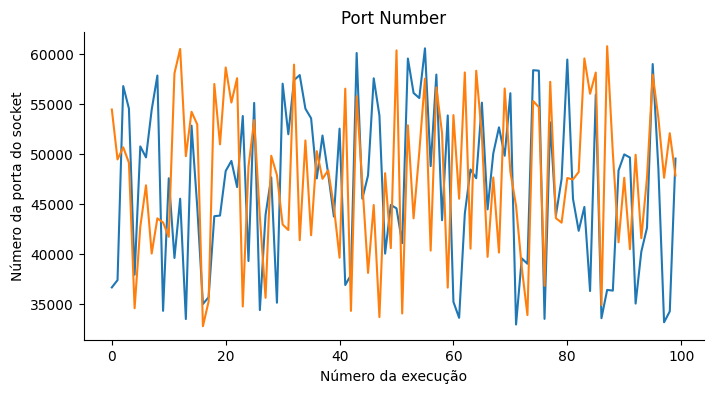

In [ ]:

df['Port Number'].plot(kind='line', figsize=(8, 4), title='Port Number', label='Sockets criados em sequencia')

plt.gca().spines[['top', 'right']].set_visible(False)

df2['Port Number'].plot(kind='line', figsize=(8, 4), title='Port Number', label='Sockets criados após o fechamento do anterior')

plt.gca().spines[['top', 'right']].set_visible(False)


plt.xlabel('Número da execução')
plt.ylabel('Número da porta do socket')


plt.show()


In [ ]:

min_port = df['Port Number'].min()
max_port = df['Port Number'].max()
average_port = df['Port Number'].mean()
median_port = statistics.median(df['Port Number'])
mode_port = statistics.mode(df['Port Number'])
variance_port = statistics.variance(df['Port Number'])
std_deviation_port = statistics.stdev(df['Port Number'])
range_port = max_port - min_port

print(f"Minimum Port: {min_port}")
print(f"Maximum Port: {max_port}")
print(f"Average Port: {average_port}")
print(f"Median Port: {median_port}")
print(f"Mode Port: {mode_port}")
print(f"Variance Port: {variance_port}")
print(f"Standard Deviation Port: {std_deviation_port}")
print(f"Range Port: {range_port}")
print(f"Change Between Executions: {'Yes' if change_between_executions else 'No'}")


Minimum Port: 32949
Maximum Port: 60587
Average Port: 46735.92
Median Port: 47587.0
Mode Port: 36663
Variance Port: 65820287.87232323
Standard Deviation Port: 8112.970348295576
Range Port: 27638
Change Between Executions: Yes


In [ ]:

min_port = df2['Port Number'].min()
max_port = df2['Port Number'].max()
average_port = df['Port Number'].mean()
median_port = statistics.median(df2['Port Number'])
mode_port = statistics.mode(df2['Port Number'])
variance_port = statistics.variance(df2['Port Number'])
std_deviation_port = statistics.stdev(df2['Port Number'])
range_port = max_port - min_port

print(f"Minimum Port: {min_port}")
print(f"Maximum Port: {max_port}")
print(f"Average Port: {average_port}")
print(f"Median Port: {median_port}")
print(f"Mode Port: {mode_port}")
print(f"Variance Port: {variance_port}")
print(f"Standard Deviation Port: {std_deviation_port}")
print(f"Range Port: {range_port}")


Minimum Port: 32779
Maximum Port: 60799
Average Port: 46735.92
Median Port: 47882.0
Mode Port: 43575
Variance Port: 58240230.71474747
Standard Deviation Port: 7631.528727243806
Range Port: 28020
